In [7]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans

iris = datasets.load_iris()

In [8]:
# k = no of clusters 
k = 3

In [9]:
X = pd.DataFrame(iris.data, columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])

In [10]:
def analyze_plot(clusters, title) :
    # lableing the data 
    labels = np.zeros_like(clusters)
    for i in range(k):
        cat = (clusters == i)
        labels[cat] = mode(iris.target[cat])[0]

    # finding accuracy 
    acc = accuracy_score(y, labels)
    print(acc)

    # visualizing the result
    plt.figure(figsize = (10, 10)) # 10 * 10 grid
    colormap = np.array(['red', 'green', 'blue'])

    # subplot ( x - axis length , y - axis length , position )
    # scatter (x - axis values , y - axis values, c = color)

    plt.subplot(2, 2, 1)
    plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y.Target],s =40)
    plt.title('Real CLusters')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    plt.subplot(2,2,2)
    plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[clusters],s =40)
    plt.title(title + ' CLusters')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

    plt.subplot(2, 2, 3)
    plt.scatter(X.Sepal_Length,X["Sepal_Width"],c = colormap[y.Target],s =40)
    plt.title('Real CLusters')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

    plt.subplot(2,2,4)
    plt.scatter(X.Sepal_Length,X.Sepal_Width,c = colormap[clusters],s =40)
    plt.title(title + ' CLusters')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

0.8933333333333333


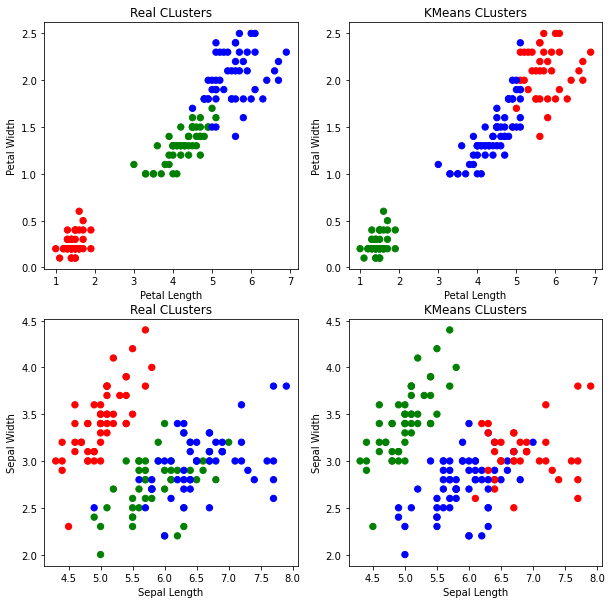

In [23]:
# KMeans 
kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(X)

analyze_plot(clusters, "KMeans")

0.9666666666666667


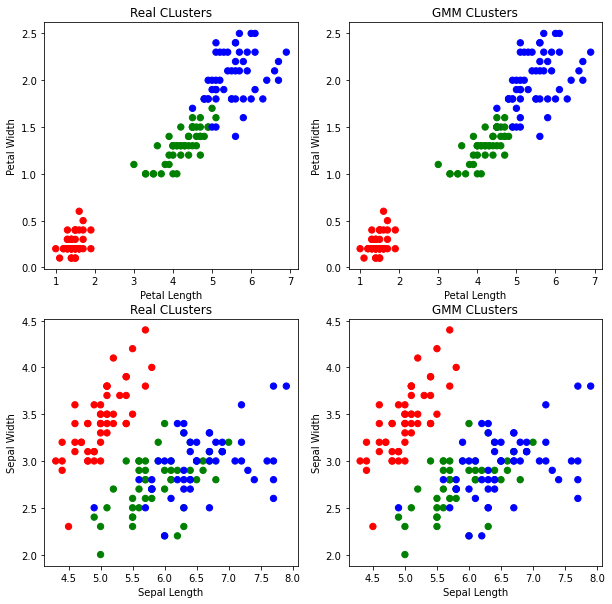

In [32]:
# GMM

scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaler_X = scaler.transform(X)

SX = pd.DataFrame(scaler_X, columns = X.columns)


gmm = GMM(n_components = k)
gmm.fit(SX)
clusters = gmm.predict(SX)

analyze_plot(clusters, "GMM")